# Sentiment Analysis

## Introduction

So far, all of the analysis I've done has been pretty generic - looking at word counts, unique words, etc. Similar techniques could be applied to numeric data as well.

With text, we want to programitacally get a sense of the general idea and context that the words are trying to express, without going through all the documents (lyrics). When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but I'll ignore those for now and keep it simple). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. 0 is neutral and +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is objective(facts). +1 is very much subjective (an opinion and has more personal views/feelings/opinions).

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various albums

## Sentiment of each Album(Year)

In [3]:
# Use corpus, which preserves word order
import pandas as pd

data_songs = pd.read_pickle('lyrics/corpus.pkl')
data_albums = pd.read_pickle('lyrics/album_corpus.pkl')
data_albums

,Album,Year,Total Album Length,Num_of_Tracks,Lyrics
Year,,,,,
2001,Room For Squares,2001,3259,13,welcome to the real world she said to me conde...
2003,Heavier Things,2003,2780,10,i worry i weigh three times my body i worry i ...
2006,Continuum,2006,2987,12,me and all my friends were all misunderstood t...
2009,Battle Studies,2009,2798,11,lightning strikes inside my chest to keep me u...
2012,Born And Raised,2012,2799,12,ooh ooh ooh ooh close your eyes and clone you...
2013,Paradise Valley,2013,2410,11,dear marie tell me what it was i used to be d...
2017,The Search For Everything,2017,2629,12,i still feel like your man i still feel like y...


In [4]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_albums['polarity'] = data_albums['Lyrics'].apply(pol)
data_albums['subjectivity'] = data_albums['Lyrics'].apply(sub)
data_albums

,Album,Year,Total Album Length,Num_of_Tracks,Lyrics,polarity,subjectivity
Year,,,,,,,
2001,Room For Squares,2001,3259,13,welcome to the real world she said to me conde...,0.099465,0.474387
2003,Heavier Things,2003,2780,10,i worry i weigh three times my body i worry i ...,0.064333,0.520421
2006,Continuum,2006,2987,12,me and all my friends were all misunderstood t...,0.133171,0.532475
2009,Battle Studies,2009,2798,11,lightning strikes inside my chest to keep me u...,0.066798,0.488612
2012,Born And Raised,2012,2799,12,ooh ooh ooh ooh close your eyes and clone you...,0.145329,0.559435
2013,Paradise Valley,2013,2410,11,dear marie tell me what it was i used to be d...,0.194770,0.494922
2017,The Search For Everything,2017,2629,12,i still feel like your man i still feel like y...,0.133297,0.518371


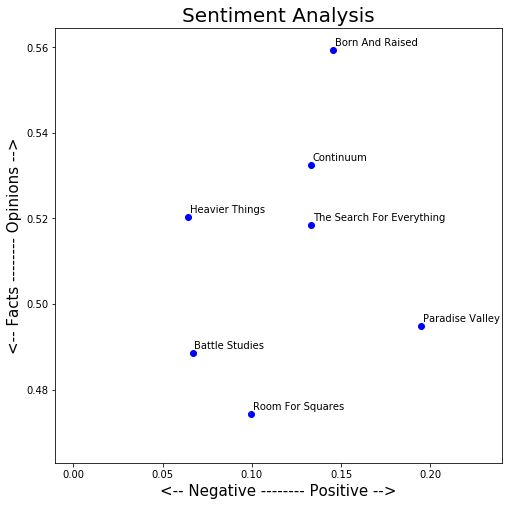

In [5]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 8]

for year in data_albums.index:
    x = data_albums.polarity.loc[year]
    y = data_albums.subjectivity.loc[year]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_albums.Album[year], fontsize=10)
    plt.xlim(-.01, .24) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

It seems that "Heavier Things" and "Battle Studies" seem to be two of the sadder albums. Looking at the songs in these albums we could see that they are infact some of the his sadder songs. Songs such as "Edge of Desire", "Assassin" and "Friends, Lovers or Nothing" talk about him feeling lonely and his breakups

### Change in Polarity Across Years - Line Plot

I thought it would be interesting to see the trend in polarity over the years

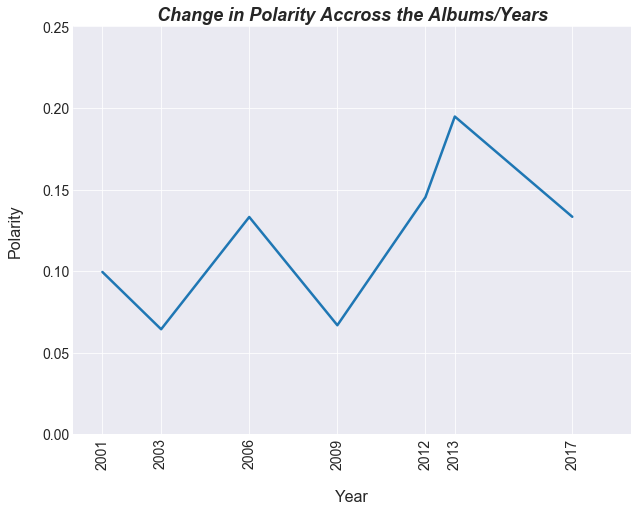

In [6]:
import numpy as np

plt.rcParams['figure.figsize'] = [10, 7.5]

# Initialize the figure
plt.style.use('seaborn-darkgrid')

# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True) 

# # Ensure that the axis ticks only show up on the bottom and left of the plot.    
# # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

# # Limit the range of the plot to only where the data is.    
# # Avoid unnecessary whitespace.    
plt.ylim(0, 0.25)    
plt.xlim(2000, 2019)

#plt.xticks(np.arange(2000,2019,1))
plt.xticks(data_albums.Year)

# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(0, 0.26, 0.05), fontsize=14)    
plt.xticks(fontsize=14, rotation=90)

# Set the x,y labels and title
plt.xlabel('Year', labelpad=20, fontsize=16)
plt.ylabel('Polarity', labelpad=20, fontsize=16)
plt.title('Change in Polarity Accross the Albums/Years',fontsize=18, style='italic', fontweight='bold')

# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
# for y in np.arange(0, 0.25, 0.05):    
#     plt.plot(range(2000, 2019), [y] * len(range(2000, 2019)), "--", lw=0.5, color="black", alpha=0.3) 

plt.plot(data_albums.Year, data_albums['polarity'], lw=2.5)

Seems like the polarity is usually alternating up and down. Except in 2012 and 2013, the albums come in quick succession and it's an increase in polarity

In [7]:
data_songs['polarity'] = data_songs['Lyrics'].apply(pol)
data_songs['subjectivity'] = data_songs['Lyrics'].apply(sub)
data_songs['polarity'].describe()

count    81.000000
mean      0.107728
std       0.153849
min      -0.173289
25%       0.000000
50%       0.095000
75%       0.205580
max       0.471491
Name: polarity, dtype: float64

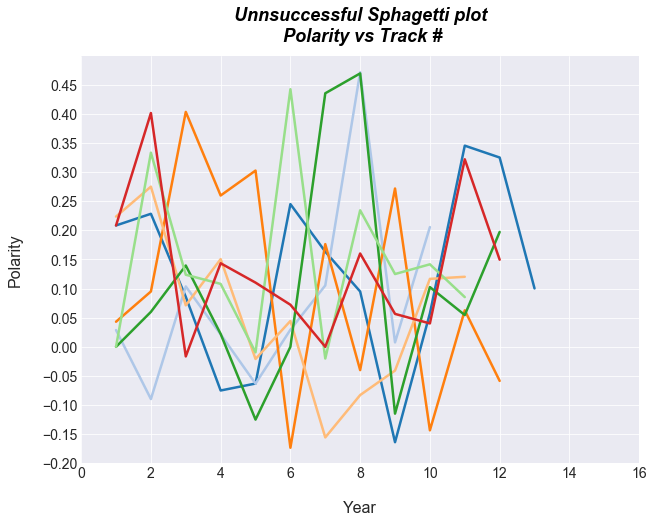

In [8]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

plt.rcParams['figure.figsize'] = [10, 7.5]

# Initialize the figure
plt.style.use('seaborn-darkgrid')

# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True) 

# # Ensure that the axis ticks only show up on the bottom and left of the plot.    
# # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

# # Limit the range of the plot to only where the data is.    
# # Avoid unnecessary whitespace.    
plt.ylim(-0.2, 0.5)    
plt.xlim(0, 16)

#plt.xticks(np.arange(2000,2019,1))
#plt.xticks(data_albums.Year)

# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(-0.2, 0.5, 0.05), fontsize=14)    
plt.xticks(fontsize=14)

# general title
plt.xlabel('Year', labelpad=20, fontsize=16)
plt.ylabel('Polarity', labelpad=20, fontsize=16)
plt.title("Unnsuccessful Sphagetti plot\n Polarity vs Track #", fontsize=18, fontweight='bold', color='black', style='italic', y=1.02)

# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in np.arange(0, 0.25, 0.05):    
    plt.plot(range(2000, 2019), [y] * len(range(2000, 2019)), "--", lw=0.5, color="black", alpha=0.3) 

for index, year in enumerate(data_albums.index):
    plt.plot(data_songs[data_songs['Year']==year]['Track #'],data_songs[data_songs['Year']==year]['polarity'], lw=2.5, color=tableau20[index])


That plot didn't really turn out how I imagined, nothing that steps out at you. So instead lets plot them separately.

Text(-2, -0.25, 'Track #')

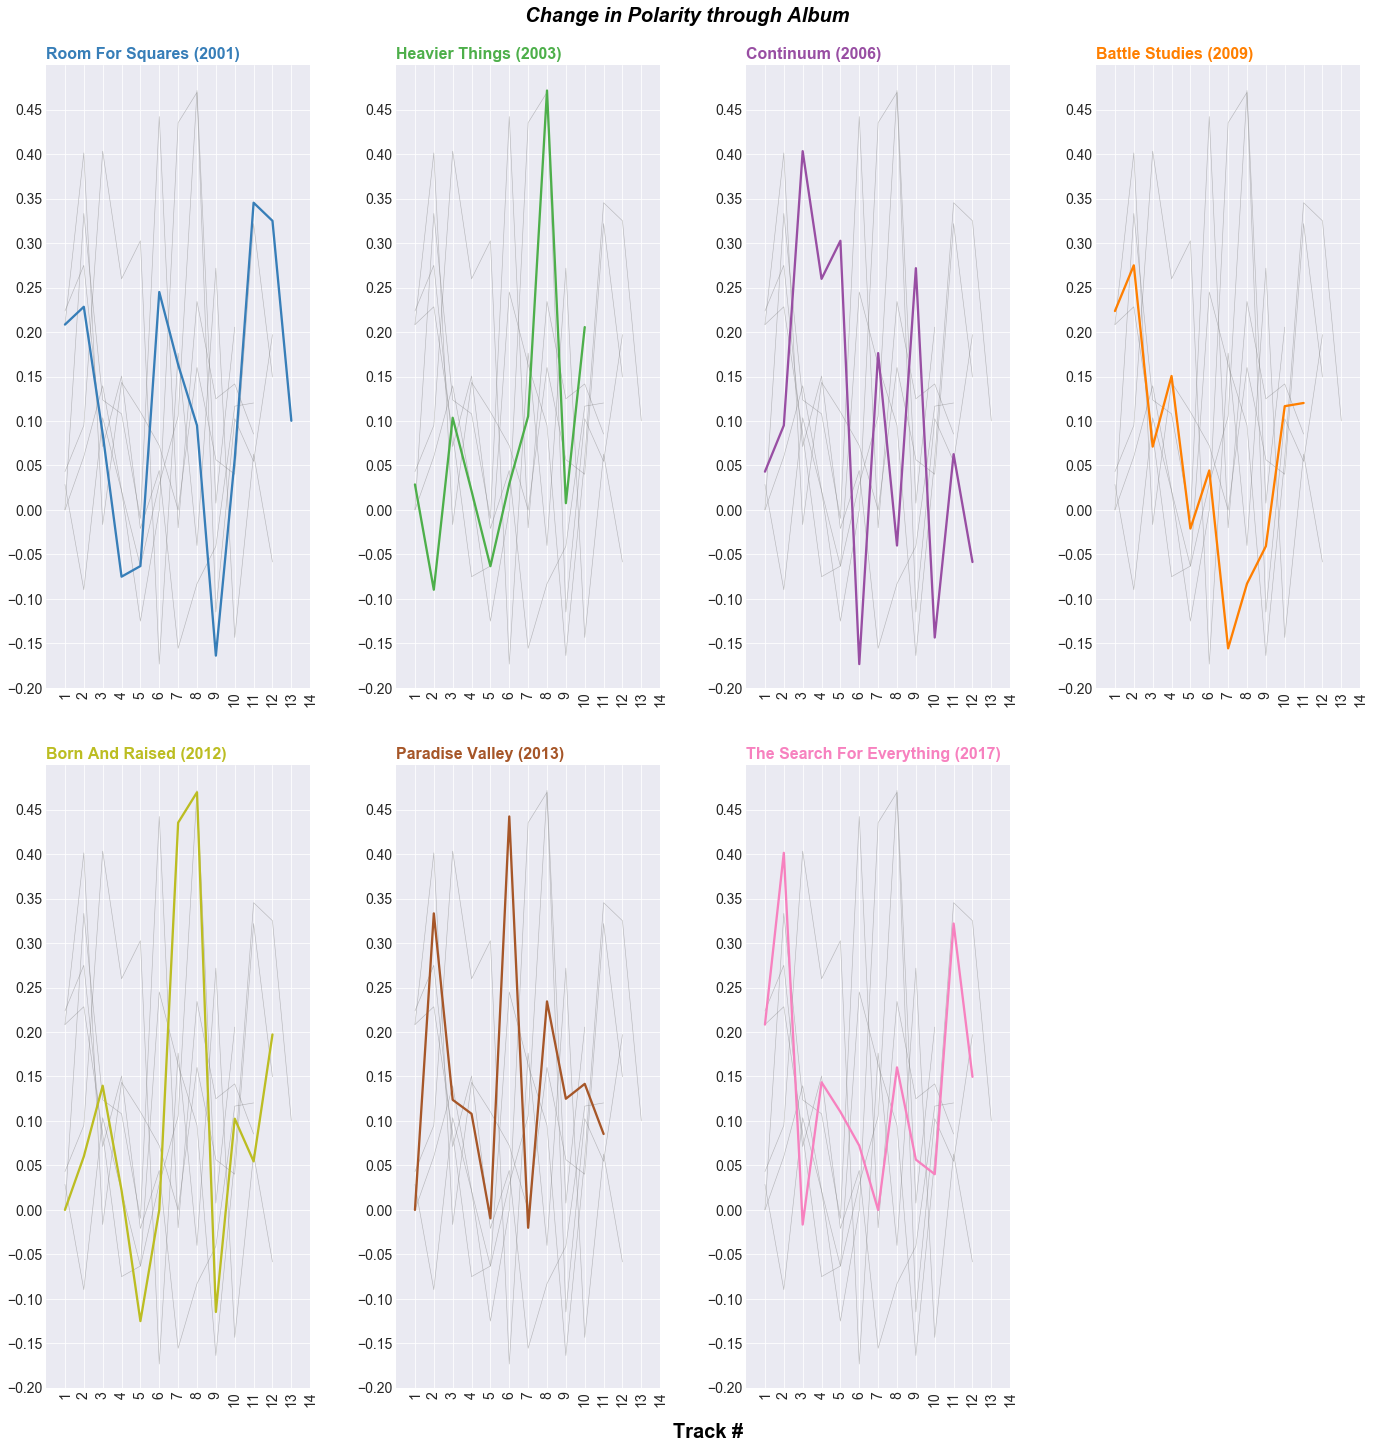

In [45]:
#plt.rcParams['figure.figsize'] = [10, 7.5]

# Initialize the figure
plt.style.use('seaborn-darkgrid')

# create a color palette - alternatively can continue to use the tableau20 color array created previously
palette = plt.get_cmap('Set1')

# multiple line plot
for index, year in enumerate(data_albums.index):
    
    index+=1
    color = palette(index) if index!=5 else tableau20[16] # Hack to avoid the bright yellow which isn't visible
    # Find the right spot on the plot
    plt.subplot(2,4, index)
    plt.rcParams['figure.figsize'] = [20, 20]
    plt.tight_layout(pad=4)
#     plt.subplots(2,2,figsize=(15,15))
 
    # plot every groups, but discreet
    for index2, year2 in enumerate(data_albums.index):
        plt.plot(data_songs[data_songs['Year']==year2]['Track #'],data_songs[data_songs['Year']==year2]['polarity'], lw=0.6, color='grey', alpha=0.5)

    # Plot the lineplot
    plt.plot(data_songs[data_songs['Year']==year]['Track #'],data_songs[data_songs['Year']==year]['polarity'], marker='', color=color, linewidth=2.3, label=year)
 
    # Same limits for everybody!
    plt.ylim(-0.2, 0.5)    
    plt.xlim(0, 14)
 
    #Set x axis ticks to track number
    plt.xticks(range(1,15,1))
    
    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
    plt.yticks(np.arange(-0.2, 0.5, 0.05), fontsize=14)    
    plt.xticks(fontsize=14, rotation=90)

    # Not ticks everywhere
#     if index in range(5):
#         plt.tick_params(
#                 axis='x',       # changes apply to the x-axis
#                 which='both',      # both major and minor ticks are affected
#                 bottom='off',      # ticks along the bottom edge are off
#                 top=False,         # ticks along the top edge are off # 'off' works too
#                 labelbottom=False) # labels along the bottom edge are off)
        
#     if index not in [1,5]:
#         plt.tick_params(
#                 axis='y',
#                 which='both',
#                 left='off',
#                 labelleft=False)
 
    # Add title
    plt.title(str(data_albums[data_albums['Year']==year]['Album'].item()+' ('+str(year)+')'), loc='left', fontsize=16, fontweight='bold', color=color )


# Add Main title
plt.suptitle("Change in Polarity through Album", fontsize=20, fontweight='bold', color='black', style='italic', y=1.0)

# Axis title
plt.text(-2, -0.25, 'Track #', ha='center', va='center', fontsize=20, fontweight='bold', color='black')
#plt.text(-2, 1, 'Polarity', ha='left', va='center', fontsize=20, fontweight='bold', color='black', rotation='vertical')


# for rank, year in enumerate(data_albums.index):
#     plt.plot(data_songs[data_songs['Year']==year]['Track #'],data_songs[data_songs['Year']==year]['polarity'], lw=2.5, color=tableau20[rank])


The pattern seems to be quite eratic, with him switching between songs with positive and negative polarity along the album.

**Conclusion** - We can see that his songs vary in levels in polarity frequently between positive and negative polarity. The takeaway is that the lyrics definitely do not have the same mood. Which supports my knowledge about his songs. Some are about heartbreak, some are more upbeat and happier.

His albums are overall positive, but Heavier Things and Battle Studies seem to be the 'heaviest'(lowest polarity). Paradise valley seems to be the most positive album. 